# Convergence and generalization analysis

[1] Yang, T., Lin, Q., & Li, Z. (2016). Unified Convergence analysis of stochastic momentum methods for convex and non-convex optimization. Available from: https://arxiv.org/abs/1604.03257

[2] Yan, Y., Yang, T., Li, Z., Lin, Q., & Yang, Y. (2018). A unified analysis of stochastic momentum Methods for Deep learning. Available from: https://arxiv.org/abs/1808.10396

The basic convergence results developed in [1, Theorem 3] shows that stochastic GD (gradient descent), CM (classic momentum) and NAG(nesterov accelerated gradient) have, in expectation, the same order of convergence; but the stochastic variant of Nesterov’s
accelerated gradient method achieves a good tradeoff (between speed of convergence in training error and robustness of convergence in testing error) among the three stochastic methods (GD, CM, NAG).

In [1]:
%load_ext autoreload
%autoreload 2
from neural import Neural
import numpy as np
import pandas as pd
from utilities import plot_TR_VAL, plot_compare, train_and_evaluate, compare_experiment,  train_and_evaluate_with_momentum
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.model_selection import train_test_split

In [2]:
columns = ['id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'y1', 'y2', 'y3']

df = pd.read_csv("CUP/ML-CUP23-TR.csv",header=None, names=columns, skiprows=7, sep=',').set_index('id')

X = df.iloc[:, :-3].to_numpy()
y = df.iloc[:, -3:].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# Exploring the optima reached and the generalization capability in Stochastic GD, CM and NAG for different stepsize 
# the same number of epochs (252), batchsize (64), sigmooid hidden function  

In [20]:
# Firts try
stepsize = 0.005

Best model found in NN_CUP.ipynb

{'layer_structure': [10, 32, 64, 32, 3],
  'epochs': 512,
  'batch_size': 64,
  'learning_rate': 0.005,
  'optimizer': 'nesterov',
  'momentum': 0,
  'l2_lambda': 0.001,
  'hidden_function': 'sigmoid',
  'output_function': 'linear',
  'init_method': 'he',
  'momentum_schedule': True}

In [21]:
# SGD
nn_sgd = Neural(layers=[X_train.shape[1], 32,64,32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = stepsize,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "classic",
            momentum = 0.0,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

# Momentum
nn_momentum = Neural(layers=[X_train.shape[1], 32,64,32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = stepsize,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "classic",
            momentum = 0.95,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

# Nesterov
nn_nesterov = Neural(layers=[X_train.shape[1], 32,64,32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = stepsize,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "nesterov",
            momentum = 0.95,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

In [6]:
print("SGD")
train_and_evaluate(nn_sgd, X_train, y_train, X_test, y_test, n_iterations=20)
print("\n\nMomentum")
train_and_evaluate(nn_momentum, X_train, y_train, X_test, y_test, n_iterations=20)
print("\n\nNesterov")
train_and_evaluate(nn_nesterov, X_train, y_train, X_test, y_test, n_iterations=20)

SGD
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
2.5374               3.0621               0.6790               0.7709              


Momentum
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
3.9983               5.0076               1.4631               1.6616              


Nesterov
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
1.5672               2.3242               0.4160               0.5383              


In [7]:
stepsize = 0.001

In [8]:
# reset the models
nn_sgd.reset()
nn_momentum.reset()
nn_nesterov.reset()

# set the new stepsize
nn_sgd.learning_rate=stepsize
nn_momentum.learning_rate=stepsize
nn_nesterov.learnign=stepsize

In [9]:
print("SGD")
train_and_evaluate(nn_sgd, X_train, y_train, X_test, y_test, n_iterations=20)
print("\n\nMomentum")
train_and_evaluate(nn_momentum, X_train, y_train, X_test, y_test, n_iterations=20)
print("\n\nNesterov")
train_and_evaluate(nn_nesterov, X_train, y_train, X_test, y_test, n_iterations=20)

SGD
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
34.6387              30.8149              4.5554               4.6992              


Momentum
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
1.3837               1.8057               0.2877               0.3969              


Nesterov
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
1.3769               2.0106               0.2875               0.4403              


In [10]:
# Try with an higher stepsize

In [8]:
# set a higher stepsize
stepsize=0.005

# reset the models
nn_sgd.reset()
nn_momentum.reset()
nn_nesterov.reset()

# set the new stepsize
nn_sgd.learning_rate=stepsize
nn_momentum.learning_rate=stepsize
nn_nesterov.learnign=stepsize

In [32]:
print("SGD")
train_and_evaluate(nn_sgd, X_train, y_train, X_test, y_test, n_iterations=20)
print("\n\n Momentum")
train_and_evaluate(nn_momentum, X_train, y_train, X_test, y_test, n_iterations=20)
print("\n\n Nesterov")
train_and_evaluate(nn_nesterov, X_train, y_train, X_test, y_test, n_iterations=20)

SGD
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
6.9191               8.2756               1.4299               1.5981              


 Momentum
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
0.5001               0.7484               0.2946               0.3393              


 Nesterov
Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
0.3060               0.5109               0.0321               0.0478              


In [22]:
nn_sgd.reset()
nn_momentum.reset()
nn_nesterov.reset()

nn_sgd.fit(X_train, y_train)
nn_momentum.fit(X_train, y_train)
nn_nesterov.fit(X_train, y_train)

In [14]:
# Compare SGD with mini-batch Momentum

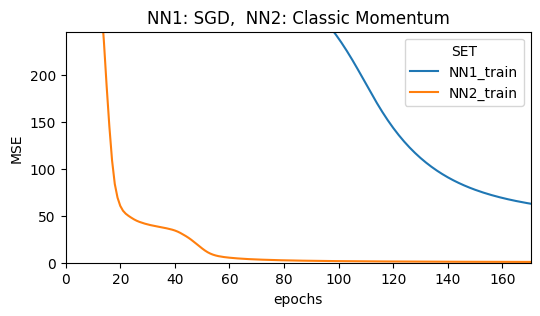

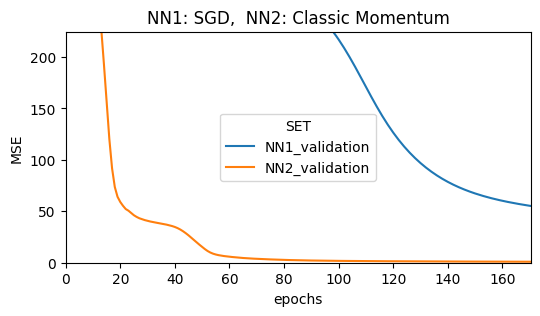

In [23]:
plot_compare(nn_sgd, nn_momentum, zoom_factor=3, figsize=(6,3), \
             title1='NN1: SGD,  NN2: Classic Momentum', title2='NN1: SGD,  NN2: Classic Momentum')

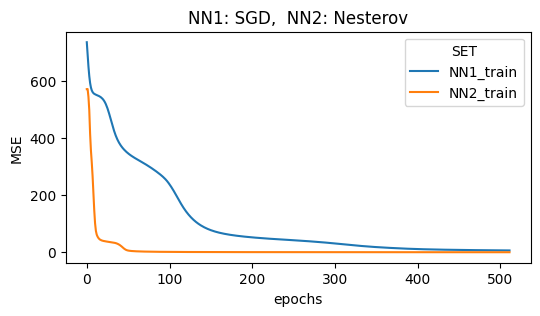

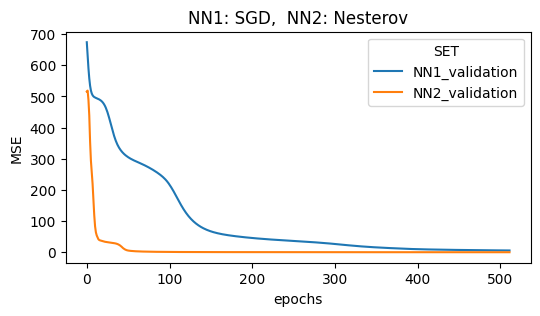

In [31]:
plot_compare(nn_sgd, nn_nesterov, zoom_factor=0, figsize=(6,3), \
             title1='NN1: SGD,  NN2: Nesterov', title2='NN1: SGD,  NN2: Nesterov')

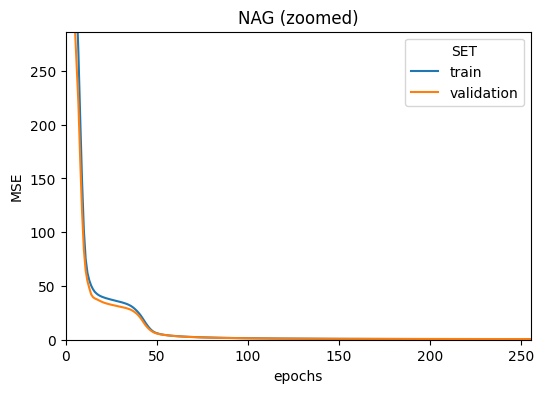

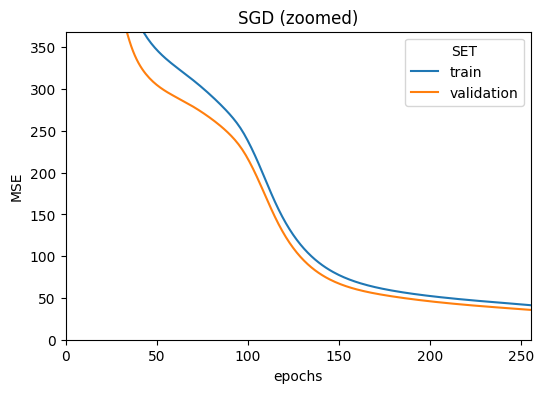

In [28]:
plot_TR_VAL(nn_nesterov, zoom_factor=2, title='NAG (zoomed)')
plot_TR_VAL(nn_sgd, zoom_factor=2, title='SGD (zoomed)')